<a href="https://colab.research.google.com/github/bahram3000/test_balancer_app/blob/main/curveuni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
'''x(usdc)=100,100,100,100,100,100,100,100,100
y(paxg)=103.55,133.62,188.52,320.71,1080.82,81.06,58.50,35.87,13.18

sup    =4171.3118,4171.3118,4171.3118,4171.3118,4171.3118,4146.3601,4121.5577,4096.9036,4072.397
inf    =3952.0454,3975.8278,3999.7533,4023.8227,4048.037,3952.0454,3952.0454,3952.0454,3952.0454
price=4058.28

x(usdc)=96.56,74.83,53.03,31.17,9.25,123.35,170.93,278.75,758.89
y(paxg)=100,100,100,100,100,100,100,100,100

sup=4171.3118,4171.3118,4171.3118,4171.3118,4171.3118,4146.3601,4121.5577,4096.9036,4072.397
inf=3952.0454,3975.8278,3999.7533,4023.8227,4048.037,3952.0454,3952.0454,3952.0454,3952.0454'''

'x(usdc)=100,100,100,100,100,100,100,100,100\ny(paxg)=103.55,133.62,188.52,320.71,1080.82,81.06,58.50,35.87,13.18\n\nsup    =4171.3118,4171.3118,4171.3118,4171.3118,4171.3118,4146.3601,4121.5577,4096.9036,4072.397\ninf    =3952.0454,3975.8278,3999.7533,4023.8227,4048.037,3952.0454,3952.0454,3952.0454,3952.0454\nprice=4058.28\n\nx(usdc)=96.56,74.83,53.03,31.17,9.25,123.35,170.93,278.75,758.89\ny(paxg)=100,100,100,100,100,100,100,100,100\n\nsup=4171.3118,4171.3118,4171.3118,4171.3118,4171.3118,4146.3601,4121.5577,4096.9036,4072.397\ninf=3952.0454,3975.8278,3999.7533,4023.8227,4048.037,3952.0454,3952.0454,3952.0454,3952.0454'

In [2]:
x1=np.array([100,100,100,100,100,100,100,100,100])
y1=np.sort(np.array([103.55,133.62,188.52,320.71,1080.82,81.06,58.50,35.87,13.18]))

In [3]:
x2=np.sort(np.array([96.56,74.83,53.03,31.17,9.25,123.35,170.93,278.75,758.89]))
y2=np.array([100,100,100,100,100,100,100,100,100])

In [4]:
print(len(x1),len(y1),len(x2),len(y2))

9 9 9 9


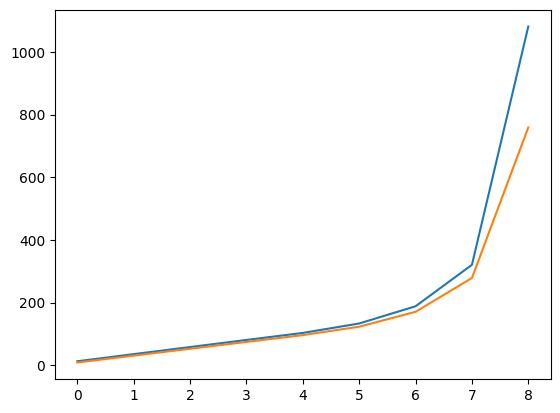

In [5]:
plt.plot(y1)
plt.plot(x2)

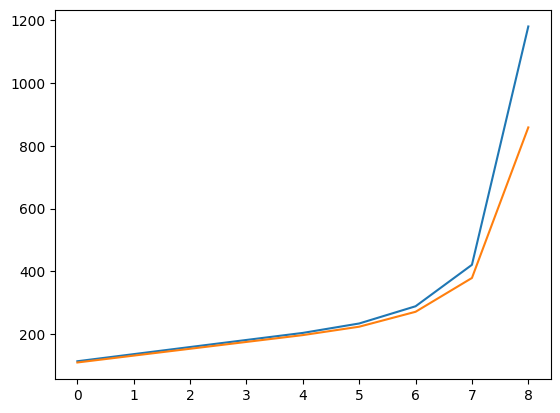

In [6]:
plt.plot(x1+y1)
plt.plot(x2+y2)

In [7]:
def f_1(x,a,b,c,d):
    return a+b*np.exp(c*x+d)

In [8]:
p=curve_fit(f_1,np.arange(9),y1,p0=[48.06950811,0.33576441,1,1])

In [9]:
p[0]

array([66.82247214,  0.1326608 ,  1.24741575, -1.04349258])

In [10]:
y1_fit=f_1(np.arange(9),*p[0])

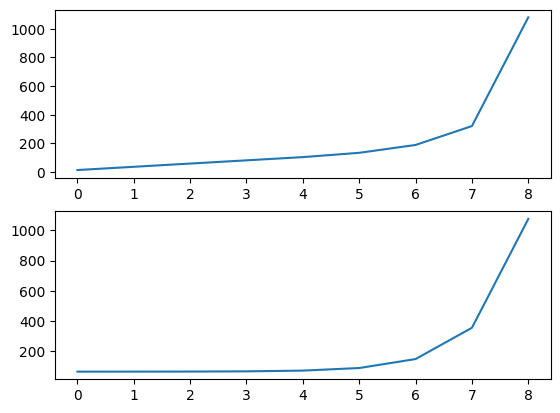

In [11]:
plt.subplot(2,1,1)
plt.plot(y1)
plt.subplot(2,1,2)
plt.plot(y1_fit)

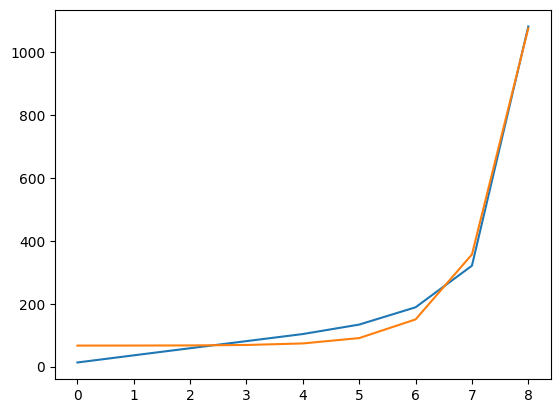

In [12]:
plt.plot(y1)
plt.plot(y1_fit)

In [13]:
y1_fit

array([  66.86919824,   66.98514133,   67.38877804,   68.79397253,
         73.68592481,   90.7164479 ,  150.0053984 ,  356.41007739,
       1074.97384262])

In [14]:
y1

array([  13.18,   35.87,   58.5 ,   81.06,  103.55,  133.62,  188.52,
        320.71, 1080.82])

In [15]:
p2=np.polyfit(np.arange(9),y1,2)

In [16]:
def f2(x,a,b,c):
  return a*x**2+b*x+c

In [17]:
y2_fit=f2(np.arange(9),*p2)

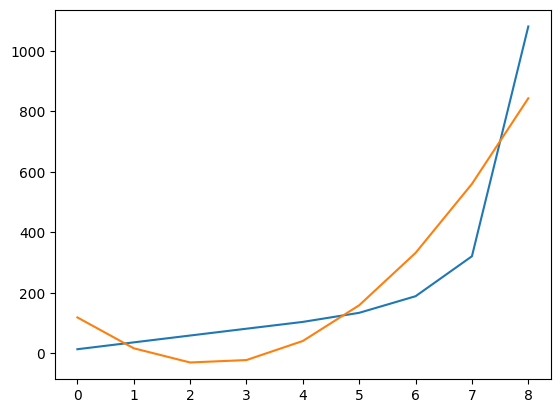

In [18]:
plt.plot(y1)
plt.plot(y2_fit)

In [19]:
def init_calculate_Liquid_amounts(lower,upper,capital):
  init_price=(lower+upper)/2
  s=np.sqrt(init_price)
  su=np.sqrt(upper)
  sl=np.sqrt(lower)
  amount_0=(capital/2)/init_price
  amount_1=capital/2
  l_0=amount_0*s*su/(su-s)
  l_1=amount_1/(s-sl)
  l=min(l_0,l_1)
  return l,amount_0,amount_1

In [20]:
def calculate_new_amounts(current_price,lower,upper,capital):
  l=init_calculate_Liquid_amounts(lower,upper,capital)[0]
  s=np.sqrt(current_price)
  su=np.sqrt(upper)
  sl=np.sqrt(lower)
  amount_0=l*((1/s)-(1/su))
  amount_1=l*(s-sl)
  return amount_0,amount_1

In [21]:
lower=4041.16853
upper=4320.2748
capital=100

In [22]:
init_calculate_Liquid_amounts(lower,upper,capital)

(np.float64(45.94260322006423), 0.01195965768747248, 50.0)

In [23]:
((upper+lower)/2)*init_calculate_Liquid_amounts(lower,upper,capital)[1]

50.0

In [24]:
current_price=4200

In [25]:
calculate_new_amounts(current_price,lower,upper,capital)

(np.float64(0.0099375409591552), np.float64(56.84115929837663))

In [26]:
calculate_new_amounts(current_price,lower,upper,capital)[0]*current_price+calculate_new_amounts(current_price,lower,upper,capital)[1]

np.float64(98.57883132682846)

In [27]:
x_p=np.linspace(start=lower,stop=upper,num=1000)

In [28]:
deposit=[]
for i in x_p:
  cna=calculate_new_amounts(i,lower,upper,capital)
  deposit.append(cna[0]*i+cna[1])

In [29]:
deposit[-1]

np.float64(99.17223091416862)

In [ ]:
#deposit

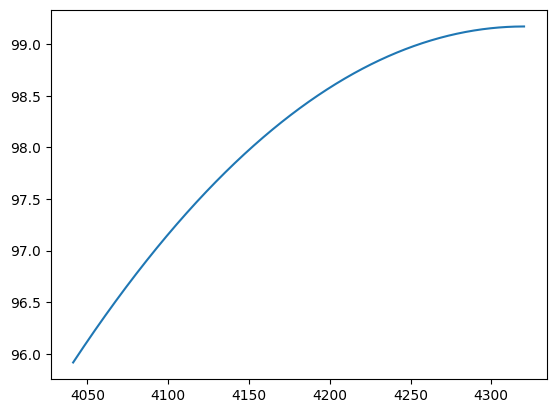

In [30]:
plt.plot(x_p,deposit)
plt.show()

In [31]:
import yfinance as yf

In [32]:
gold_df=yf.download(tickers='GC=F',period='max',interval='1D')

/tmp/ipython-input-1460543229.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_df=yf.download(tickers='GC=F',period='max',interval='1D')
[*********************100%***********************]  1 of 1 completed


In [33]:
closes=gold_df.loc[:,'Close'].values[:,0]

In [34]:
from my_func_pkg import exp_change,mean_exp

In [35]:
ret=exp_change(closes)

In [36]:
eavg=mean_exp(ret)
eavg

np.float64(1.0004271325838292)

In [37]:
fee_apr=1.58

In [38]:
dpr=fee_apr**(1/365)
dpr

1.0012540043657843

In [40]:
x_p2=np.array([lower*(dpr**i) for i in range(30)])
deposit2=[]
hold=[]
all=[]
j=0
for i in x_p2:
  cna=calculate_new_amounts(i,lower,upper,capital)
  deposit2.append(cna[0]*i+cna[1])
  hold.append(((capital/2)+(i/((lower+upper)/2))*(capital/2)))
  all.append((deposit2[j]+(capital*j*(dpr-1))))
  j+=1


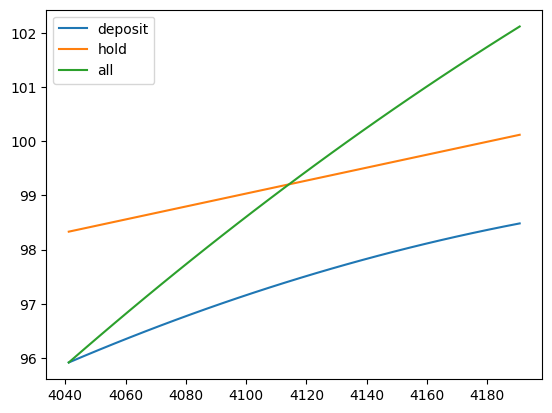

In [42]:
plt.plot(x_p2,deposit2)
plt.plot(x_p2,hold)
plt.plot(x_p2,all)
plt.legend(['deposit','hold','all'])
plt.show()

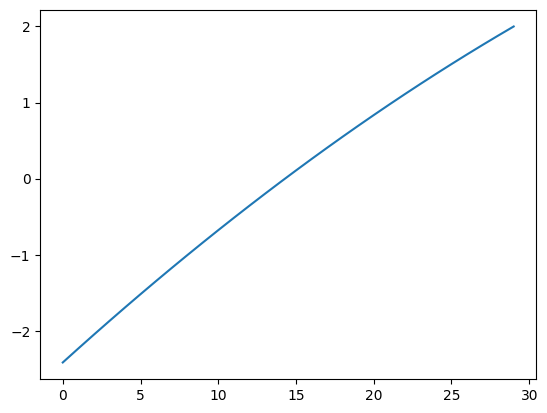

In [45]:
plt.plot(np.array(all)-np.array(hold))

In [46]:
all[-1]

np.float64(102.11979580124128)

In [87]:
fee_aprv=np.linspace(start=1,stop=3,num=200)

In [88]:
d=[]
a=[]

for i in fee_aprv:
  dprv=i**(1/365)
  x_pv=np.array([lower*(dprv**_) for _ in range(30)])
  depositv=[]
  allv=[]

  j=0
  for k in x_pv:
    cna=calculate_new_amounts(k,lower,upper,capital)
    depositv.append(cna[0]*k+cna[1])
    allv.append((deposit2[j]+(capital*j*(dprv-1))))
    j+=1
  d.append(depositv)
  a.append(allv)

In [89]:
all_deposit=np.array(d)
all_lpprovide=np.array(a)
hold=np.array(hold)

In [90]:
all_deposit.shape

(200, 30)

In [91]:
all_lpprovide.shape

(200, 30)

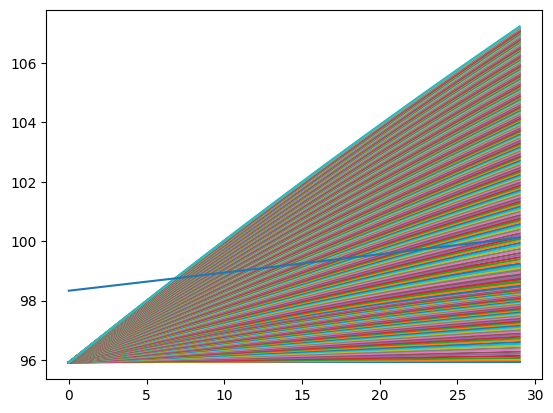

In [92]:
plt.plot(all_deposit.T)
plt.plot(all_lpprovide.T)
plt.plot(hold)
plt.show()

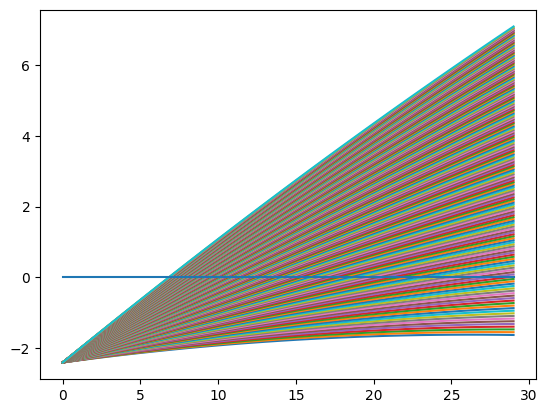

In [93]:
plt.plot((all_lpprovide-hold).T)
plt.plot([0]*30)
plt.show()

In [100]:
(all_lpprovide-hold).shape

(200, 30)

In [101]:
real_gain=(all_lpprovide-hold)

In [106]:
numinal_gain=(all_lpprovide-np.array([100]*30))

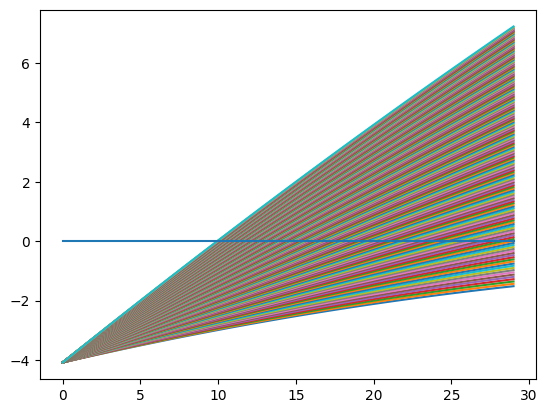

In [108]:
plt.plot(numinal_gain.T)
plt.plot([0]*30)
plt.show()

In [103]:

for i,j in enumerate(real_gain):
  #print(i)
  if j[-1] < 0:
    continue
  else:
    print(i)
    break

23


In [105]:
fee_aprv[23]

np.float64(1.2311557788944723)

In [111]:
for i,j in enumerate(numinal_gain):
  if j[-1]<0:
    continue
  else:
    print(i)
    break

21


In [112]:
eavg

np.float64(1.0004271325838292)

In [113]:
def tick_price(ind:int,tick_spacing:int):
  return 1.0001**((tick_spacing)*i)

In [117]:
def num_tick(price):
  return np.log(price)/np.log(1.0001)

In [118]:
num_tick(eavg)

np.float64(4.270627403881076)

In [120]:
1.0001**num_tick(eavg)

np.float64(1.0004271325838292)

In [126]:
closes[-1]

np.float64(4092.0)

In [123]:
(np.log(closes[-1])/np.log(1.0001))

np.float64(83172.04959598476)

In [125]:
d=(np.log(closes[-1])/np.log(1.0001))//100
print(d*100,(d+1)*100)

83100.0 83200.0


In [127]:
def up_down_tick(price:float):
  dw=(np.log(price)/np.log(1.0001))//100
  return (dw*100,(dw+1)*100)

In [129]:
(np.log(100)/np.log(1.0001))/4.27

np.float64(10785.481125668499)

In [131]:
print(1.0001**83100,1.0001**83200)

4062.6247249668313 4103.452730662909


In [132]:
1.0001**100

1.0100496620928754

In [ ]:
#evg**x=1.0001**100

In [145]:
(1-1.0100496620928754)/(1-eavg)

np.float64(23.52820288909149)

In [147]:
(1-(1.0001**100))/(1-eavg)

np.float64(23.52820288909149)

In [140]:
(np.log(1.0100496620928754)/np.log(eavg))

np.float64(23.41576319889695)

In [141]:
(np.log(1.0100496620928754)/np.log(eavg))/2

np.float64(11.707881599448475)